# Corporate FinTech Assignment 1.

Marton Nemeth - manem18@student.sdu.dk

Michal Minarcik - mimin18@student.sdu.dk

Nicolas Hamann Hiemstra von Arenstorff - niare21@student.sdu.dk

Toheed Adeola Musa - amusa18@student.sdu.dk

Zalan Taller - zatal21@student.sdu.dk

## Exercise 1:

Summary of Petukhina et. al. (2021) Investing with Cryptocurrencies - evaluating their potential for portfolio allocation strategies

·   Introduction and motivation
Petukhina et. al. (2021) expand the existing asset allocation literature by adding cryptocurrencies (CCs) to well diversified portfolios of conventional financial assets. Motivated by their strong growth in market value evidence of low correlation of returns (in their particular dataset) with those of traditional assets and a recognition by investors as a novel asset class of alternative investments, the authors conduct an empirical study to better understand the role of CCs in investors’ portfolios.

·   Research questions and hypotheses development
Petukhina et. al. take the perspective of an individual rational investor who is contemplating adding CCs to her portfolio. Since investors differ based on their risk profiles, investment targets and preferences, the authors consider return-oriented, risk-oriented and risk-return oriented strategies.  Therefore, the authors try to measure whether an investment in CCs is equally beneficial across different type of investors and whether the risk-adjusted returns differ compared to optimal portfolios (Hypotheses 1 and 2).
Moreover, adding more assets to a portfolio generally improves the portfolio diversification, however it also increases the costs and complexity of the portfolio. In the case of CCs, further risks, such as drying out of liquidity and de-listing from exchanges exist. Therefore, allocating to a lower variety of CCs may be optimal and the researchers study if investors with different profiles include the same number of CCs into their optimal portfolios (Hypothesis 3).
To further extend the analysis, the authors try to find out whether the beneficial properties of CCs can be captured only by professional investors who are able to maintain high trading frequency, or whether it is satisfactory to rebalance the portfolio with less frequency (Hypothesis 4).
Next up, the authors aim to study the breadth of the optimal CC investment holdings, by testing which coins extend the set of achievable risk/return combinations (Hypothesis 5).
Since the authors take the perspective of a real-world investor, they are interested in whether these strategies can be implemented in practice. To address the low liquidity problem of various CCs, the authors implement the LIBRO methodology[1] and compare the restricted portfolios to their unrestricted counterparts (Hypothesis 6).

·   Methodology and performance evaluation
Petukhina et. al. choose a 1-year rolling-window approach to investigate the out-of-sample performance of strategies for monthly, weekly, and daily rebalancing frequencies.[2] The authors consider 9 asset allocation strategies, which can be classified as model-free, risk-oriented, return-oriented, risk-return oriented, and combination models. In all models, the authors restrict themselves to long-only approach, which is a standard in the CC literature.
The scholars measure the performance of the investments strategies as they develop over time, based on the time series of daily out-of-sample returns. They consider 5 performance criteria widely used in related literature as well as by practitioners, which are: Cumulative wealth, Sharpe ratio, Certainty equivalent return, Adjusted Sharpe ratio, Portfolio turnover, and Target turnover. To test for performance differences between strategies, Petukhina et. al. perform Kolmogorov-Smirnov tests for equal distributions of the returns for each of the strategies compared to their chosen benchmark strategy of equally weighted assets.
To evaluate portfolio concentration and diversification effects, they calculate three measures: the Portfolio Diversification Index (PDI), Effective N, and the Diversification Ratio. The PDI summarizes the diversification of many assets with a single statistic and is able to compare diversification across different portfolios or time periods. In case when all assets in the portfolio are perfectly uncorrelated the  and the maximum diversification portfolio is equal to the equally weighted portfolio. On the other hand, a  indicates diversification is effectively impossible. The PDI was proposed by Rudin and Morgan (2006) and is the subject of maximization in Petukhina et. al. (2021) instead of the diversification ratio.
Second measure used to measure the diversification effect is the Effective N. It can be interpreted as the number of equally-weighted assets that would provide the same diversification benefits as the portfolio under consideration. It is defined in the paper in Equation (21) and varies from 1 in the case when the entire portfolio is invested in a single asset, to -its maximum achieved by an equally-weighted portfolio.
Lastly, the authors report the diversification ratio. which was suggested by Choueifaty et. al. (2011) and measures the proportion of a portfolio’s weighted volatility to its overall volatility. It is similar in its form to the Sharpe ratio, with the sum of weighted asset volatilities in the numerator instead of the expected excess return. In case of perfectly correlated assets or in the case of a mono-asset portfolio, the diversification ratio will be equal to, otherwise in long-only portfolios it will be strictly higher than 1, and equal to in the case of perfectly uncorrelated assets. (Choueifaty and Coignard 2008).

·   Data
For the empirical analysis, the researchers collect daily data on a sample of CCs and traditional assets ranging from 2015/01/01 to 2019/12/31. CCs prices are obtained from CoinGecko and data for traditional assets are from Bloomberg. The dataset includes 52 CCs and 16 traditional assets.

·   Results
The results show that the usefulness of CCs in a portfolio strongly depends on the investor’s objective. The investors who benefit the most from including CCs into their portfolios are investors with return or at least risk-return orientation. The risk-averse investors are shown to be better of holding only traditional assets. The best performance was achieved by investors targeting high returns and strong diversification. These strategies include a broad cross-section of CCs. The authors also show that the differences between rebalancing frequencies are not statically significant, and the results apply qualitatively in the same way. When imposing the LIBRO restriction, the impressive theoretical performance of a strategy with very broad exposure to CCs can drop significantly. Finally, regarding diversification benefits, the authors demonstrate a benefit beyond well-diversified, global portfolios of traditional assets without CCs. These benefits are shown to be persistent across all considered frameworks.

[1] LIBRO framework for portfolio formation prevents too high portfolio weights for low-liquidity assets, by introducing weight constraints in the portfolio optimization which depend on liquidity. The authors employ Trading Volume as a proxy for liquidity.
[2] As a robustness test, they also calculate with extending windows, where no historical data is dropped, and only new observations are added as they become observable. They report the results to be qualitatively the same.

## Exercise 2:

In [40]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import scipy.optimize as sco
import statsmodels.api as sm
from matplotlib.pylab import mpl, plt

In [41]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [42]:
crypto = pd.read_csv('/Users/tallerzalan/Desktop/crypto-markets.csv', parse_dates = True)

In [43]:
crypto['date'] = pd.to_datetime(crypto['date'])
crypto = crypto[(crypto['date'] >= '2017-01-01') & (crypto['date'] <= '2018-06-29')]
crypto = crypto.set_index('name')
crypto = crypto.reset_index()

### Exercise 2.1:

In [44]:
# We group the CCs by name and we calculate the median trade volume, presented in a decreasing order.
cryptos_ranked = crypto.groupby('name').agg(Median_Volume=('volume', 'median')).sort_values(by = 'Median_Volume', ascending = False)

### Exercise 2.2a.):

We have created a function that retrieves the k = {5, 10, 15, 20, 25} (or basically any number of CCs) in an understandable way, thus the user can easily adjust the desired number in the top_cryptos() function below. The default value is set to 25. Because of the space constraint in our report, we have decided to report only the maximum number of CCs (25), this way the necessary calculations and graphs is still visible for the lower number of CCs in the portfolio.

In [45]:
number_of_cryptos = 5

def top_cryptos(k):
  return crypto.groupby('name').agg(Median_Volume=('volume', 'median')).sort_values(by = 'Median_Volume', ascending = False).head(n = k)

In [46]:
def calc_log_ret(crypto):
    crypto["log_return"] = np.log(crypto['close'] / crypto['close'].shift(1))
    return crypto

# This function is aimed at calculation the log returns for various CCs
crypto = crypto.groupby('name').apply(calc_log_ret)

In [47]:
top_k_cryptos = list(top_cryptos(number_of_cryptos).index)

In [48]:
closed_price = pd.pivot_table(
  data = crypto,
  index = 'date',
  columns = 'name',
  values = 'close',
  dropna = False
)
close_k = closed_price[top_k_cryptos]

In [49]:
log_returns = pd.pivot_table(
  data = crypto,
  index = 'date',
  columns = 'name',
  values = 'log_return',
  dropna = False
)
log_k = log_returns[top_k_cryptos]

<AxesSubplot:xlabel='date'>

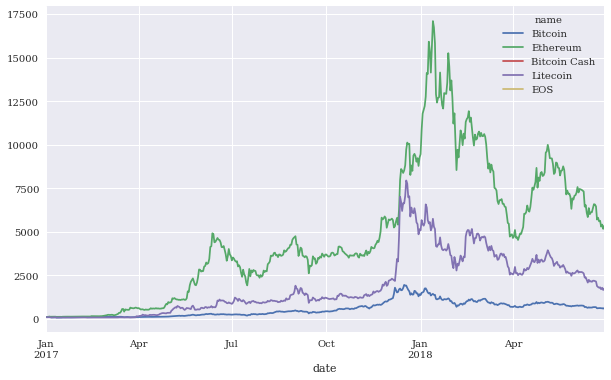

In [50]:
(close_k / close_k.iloc[0] * 100).plot(figsize=(10, 6))

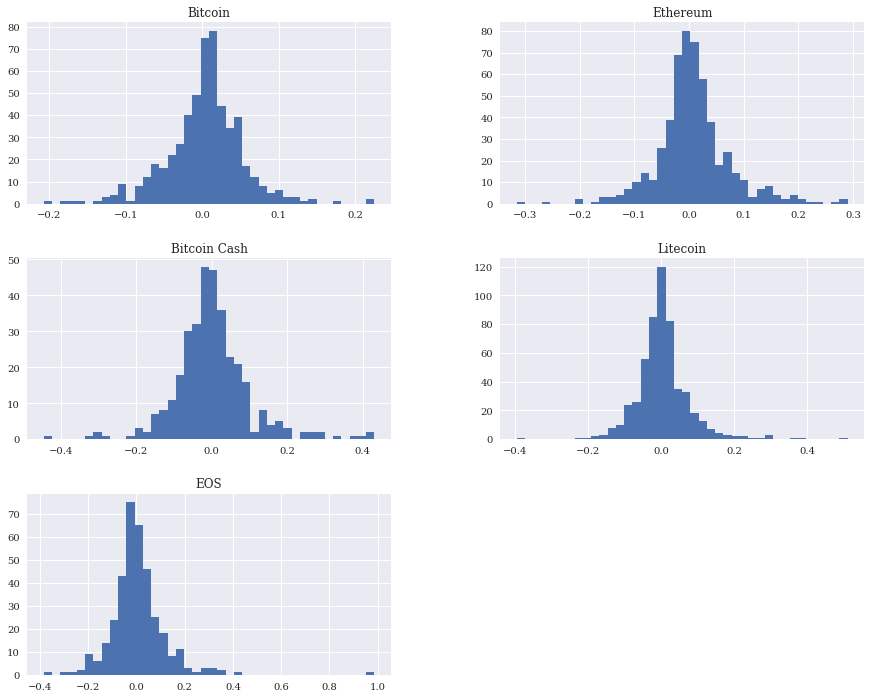

In [51]:
log_k.hist(bins=40, figsize=(15, 12));

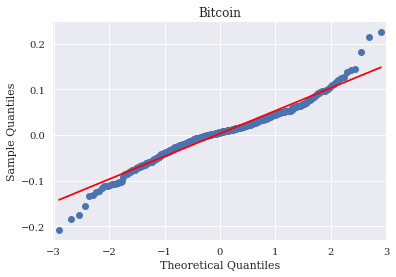

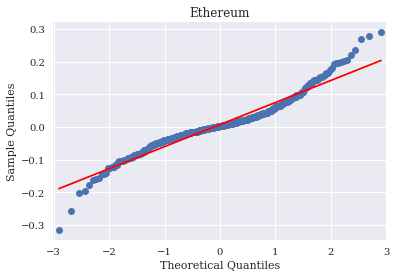

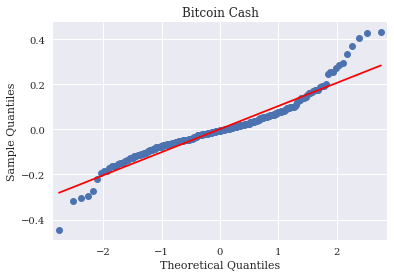

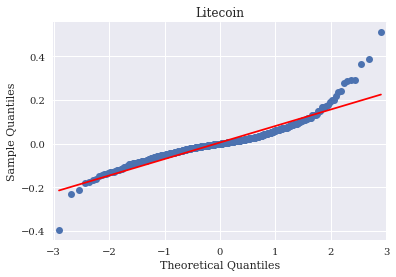

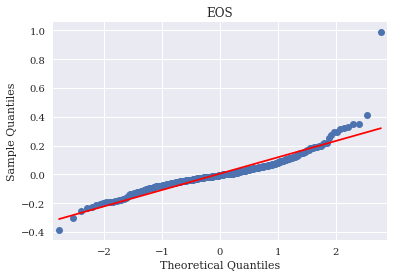

In [52]:
for sym in top_k_cryptos:
    sm.qqplot(log_returns[sym].dropna(), line='s')
    plt.title(sym)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles');

### Exercise 2.2b.):

In [53]:
traditional = pd.read_csv('/Users/tallerzalan/Desktop/tr_eikon_eod_data.csv', index_col = 0, parse_dates = True)
traditional.index = pd.to_datetime(traditional.index)

In [54]:
traditional = traditional[traditional.index >= '2017-01-01']
traditional_log = np.log(traditional / traditional.shift(1))

In [55]:
# We assume that in our portfolio we hold all the given traditional assets + k amount of CCs. Therefore the first portfolio with k = 5 CCs will include 17 assets in total.
traditional_symbols = np.array(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'SPY', '.SPX', '.VIX', 'EUR=', 'XAU=', 'GDX', 'GLD'])
noa = len(traditional_symbols) + len(top_k_cryptos)

In [56]:
portfolio = pd.concat([traditional_log, log_k], axis = 1)

array([[<AxesSubplot:title={'center':'AAPL.O'}>,
        <AxesSubplot:title={'center':'MSFT.O'}>,
        <AxesSubplot:title={'center':'INTC.O'}>,
        <AxesSubplot:title={'center':'AMZN.O'}>],
       [<AxesSubplot:title={'center':'GS.N'}>,
        <AxesSubplot:title={'center':'SPY'}>,
        <AxesSubplot:title={'center':'.SPX'}>,
        <AxesSubplot:title={'center':'.VIX'}>],
       [<AxesSubplot:title={'center':'EUR='}>,
        <AxesSubplot:title={'center':'XAU='}>,
        <AxesSubplot:title={'center':'GDX'}>,
        <AxesSubplot:title={'center':'GLD'}>],
       [<AxesSubplot:title={'center':'Bitcoin'}>,
        <AxesSubplot:title={'center':'Ethereum'}>,
        <AxesSubplot:title={'center':'Bitcoin Cash'}>,
        <AxesSubplot:title={'center':'Litecoin'}>],
       [<AxesSubplot:title={'center':'EOS'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

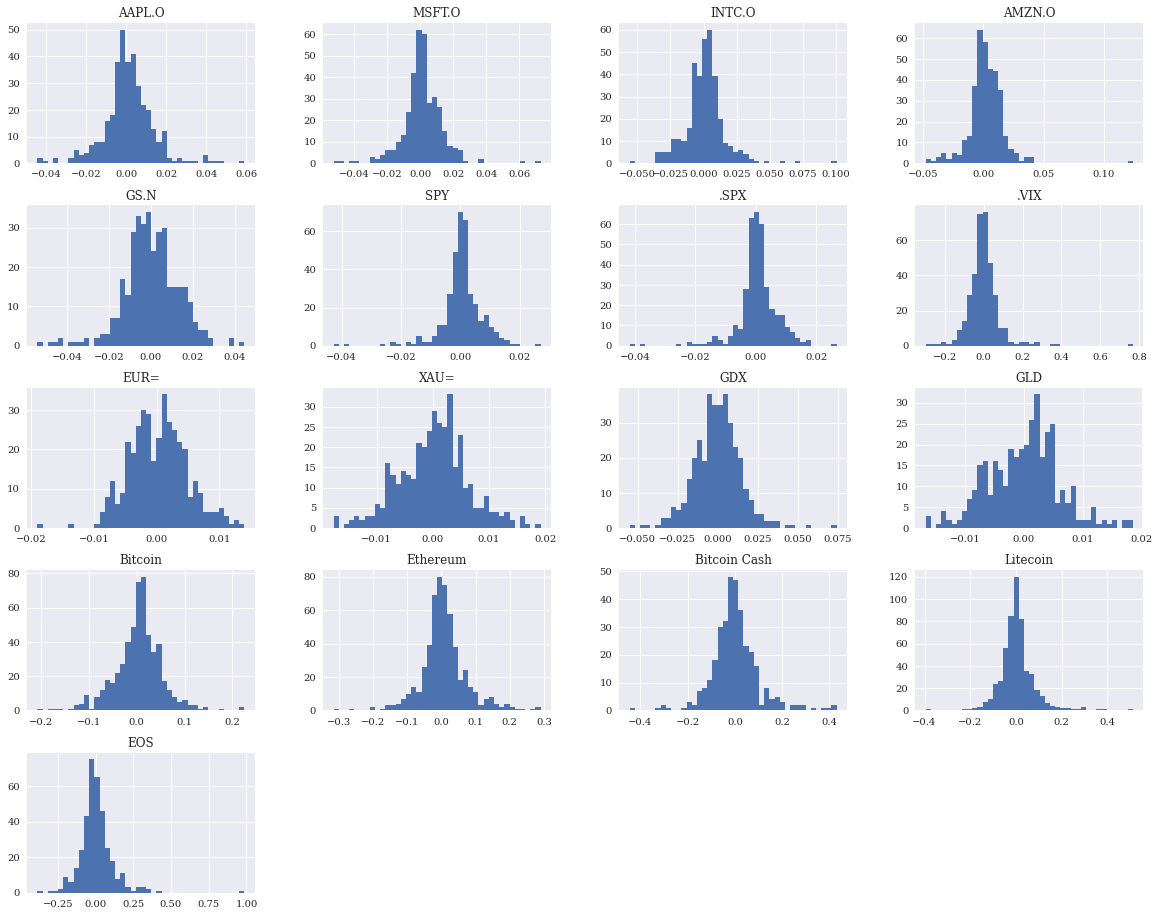

In [57]:
portfolio.hist(bins = 40, figsize = (20, 16))

In [58]:
portfolio.mean() * 252 # annualized average log returns for CCs and TAs in the portfolio

AAPL.O          0.333769
MSFT.O          0.328048
INTC.O          0.225099
AMZN.O          0.538127
GS.N            0.029989
SPY             0.149930
.SPX            0.150137
.VIX           -0.341219
EUR=            0.071819
XAU=            0.034699
GDX            -0.024545
GLD             0.022389
Bitcoin         0.847335
Ethereum        1.842378
Bitcoin Cash    0.406217
Litecoin        1.324962
EOS             1.412837
dtype: float64

In [59]:
portfolio.cov() * 252 # annualized covariance for CCs and TAs in the portfolio

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD,Bitcoin,Ethereum,Bitcoin Cash,Litecoin,EOS
AAPL.O,0.040458,0.022140,0.020876,0.023474,0.016591,0.013740,0.013550,-0.141151,-0.000398,-0.000410,0.003826,-0.000534,0.012892,0.015759,0.025345,0.027212,-0.022559
MSFT.O,0.022140,0.037865,0.027877,0.029283,0.019414,0.016456,0.016530,-0.158817,0.000339,-0.000058,0.005610,0.000288,0.011194,0.014375,-0.005680,0.023680,-0.008945
INTC.O,0.020876,0.027877,0.058575,0.025581,0.018157,0.016389,0.016571,-0.149983,0.000178,0.000221,0.004296,0.000350,0.003346,0.003163,0.001057,0.020276,0.007390
AMZN.O,0.023474,0.029283,0.025581,0.053526,0.012468,0.013682,0.013581,-0.139342,-0.000292,0.000159,0.004462,0.000186,0.000186,0.009501,0.011580,0.012754,-0.004486
GS.N,0.016591,0.019414,0.018157,0.012468,0.043928,0.015823,0.015608,-0.147369,-0.000738,-0.004710,-0.005506,-0.004454,0.014232,0.019839,-0.015670,0.039732,0.008280
SPY,0.013740,0.016456,0.016389,0.013682,0.015823,0.011961,0.011785,-0.114797,0.000322,-0.000680,0.002250,-0.000512,0.007746,0.014383,-0.004910,0.015761,-0.000220
.SPX,0.013550,0.016530,0.016571,0.013581,0.015608,0.011785,0.011757,-0.115032,0.000304,-0.000734,0.002189,-0.000554,0.007915,0.014245,-0.005219,0.016698,-0.000156
.VIX,-0.141151,-0.158817,-0.149983,-0.139342,-0.147369,-0.114797,-0.115032,1.838091,-0.006746,0.009611,-0.023946,0.008234,-0.168223,-0.236826,-0.127688,-0.216210,-0.065994
EUR=,-0.000398,0.000339,0.000178,-0.000292,-0.000738,0.000322,0.000304,-0.006746,0.005427,0.003836,0.008066,0.003748,0.001121,0.010119,0.001333,-0.004530,0.011080
XAU=,-0.000410,-0.000058,0.000221,0.000159,-0.004710,-0.000680,-0.000734,0.009611,0.003836,0.009588,0.018455,0.009454,-0.000472,0.009039,-0.000659,-0.006026,0.013739


In [60]:
np.random.seed(1)
weights = np.random.random(noa)
weights /= np.sum(weights)

In [61]:
np.sum(portfolio.mean() * weights) * 252 * 100

58.91146556552233

In [62]:
np.dot(weights.T, np.dot(portfolio.cov() * 252, weights)) * 100

11.401368371256106

In [63]:
annualized_portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(portfolio.cov() * 252, weights))) * 100

In [64]:
def port_ret(weights):
    return np.sum(portfolio.mean() * weights) * 252

In [65]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(portfolio.cov() * 252, weights)))

In [66]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

/var/folders/bh/t4pmhqqn52n_y66q9mqwj6pw0000gn/T/ipykernel_1977/3809506353.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe Ratio');


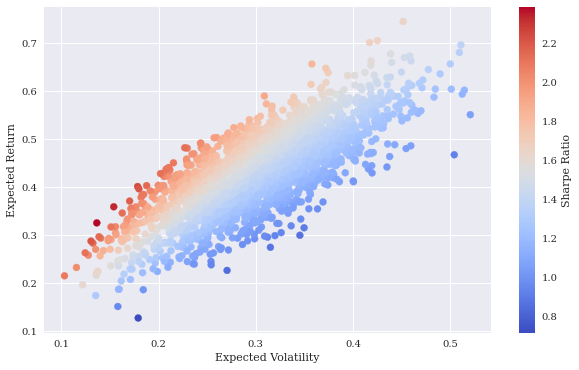

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio');

In [68]:
def min_func_sharpe(weights):
    return -port_ret(weights) / port_vol(weights) * 100

In [69]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [70]:
bnds = tuple((0, 1) for x in range(noa))

In [71]:
eweights = np.array(noa * [1 / noa])

In [72]:
min_func_sharpe(eweights)

-149.4139763187482

In [73]:
%%time
opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)

CPU times: user 2.04 s, sys: 122 ms, total: 2.16 s
Wall time: 2.81 s


In [74]:
port_ret(opts['x']).round(3) * 100

26.700000000000003

In [75]:
optimized_portfolio_annual_volatility = port_vol(opts['x']).round(3) * 100

In [76]:
port_ret(opts['x']) / port_vol(opts['x'])

3.4832800446273104

In [77]:
DR_squared = (annualized_portfolio_volatility/optimized_portfolio_annual_volatility) ** 2
DR_squared

19.22983365028859

### Reported values:

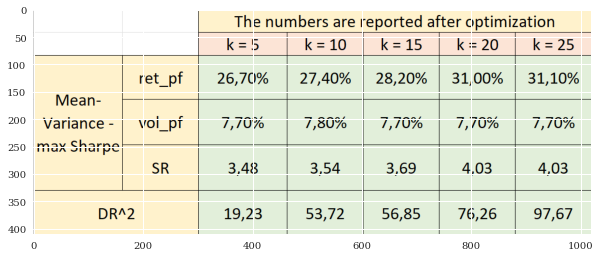

In [78]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("/Users/tallerzalan/Desktop/Results.png")
plt.figure(figsize = (10,10))
plt.imshow(image)
plt.show()

## Exercise 2.3:

·   Interpretation of descriptive statistics of the CCs and traditional assets
The measure of central tendency shows an annualized average log return of 120% for the CCs and 1.16% for the traditional assets. The average return of CCs is diminished by the two stablecoins, which have a mean return of 0%. The average return of the traditional assets suffers because of a deeply negative -34% average return of the VIX index. The measure of volatility reveals that the returns of the CCs are distributed around the mean by 155% on average. Most of the CCs in our sample have a positive skewness which means that the tail of the right side of the return distribution is longer than the left tail. The average kurtosis of the CCs is very high, which indicates that their returns are more extreme than predicted by the standard normal distribution. Additional descriptive statistics are presented in the tables above.

·   Summary of the portfolio optimization results
We have conducted mean-variance optimization of a portfolio consisting of 12 traditional assets + k number of CCs. From the results table we can observe that the more CCs we add to the portfolio, the better the Sharpe ratio. By adding CCs to the portfolio, we obtain an astronomically high Sharpe ratios of 4.03, 4.03, 3.69, 3.54, and 3.48 for 25, 20, 15, 10, and 5 CCs respectively. We can also observe that the volatility of all the portfolios is constant at around 7.7%, regardless of the amount of CCs included. This is because the CCs are highly correlated together and therefore including more of them does not influence the volatility of the portfolio. To measure the diversification effects of adding CCs to the traditional portfolio, we report the diversification ratio.  We report the results for DR^2 for comparability. In our case the DR is very high and gradually increasing with the number of CCs in the portfolio. The DR^2 increases beyond the number of assets, we think this might be caused by the weights generated by the mean-variance portfolio.

·   Recommendation to a client
Since we have only conducted portfolio optimization with CCs and not without them, we can’t comment based on our findings whether it is optimal to include them to the traditional portfolio or not. However, one can assume that the portfolio of traditional assets would not achieve a SR of 4. Another thing to consider is that the optimization has been done in-sample and the results might not be obtainable out-of-sample with proper backtesting.
